<a href="https://colab.research.google.com/github/davivaug2/math4000_machine_learning_2023/blob/main/proj1_MATH4000_machine_learning_Vaughan_2023_03_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cuda:0


In [2]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

train_dataset = dsets.CIFAR10(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.CIFAR10(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data


torch.Size([3, 32, 32])
6
size torch.Size([3, 32, 32])


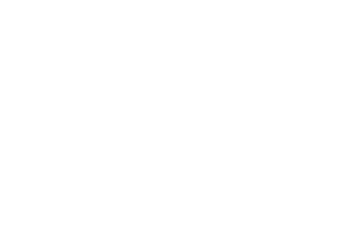

In [4]:
import matplotlib.pyplot as plt

img, label = train_dataset[0]
print(img.shape)
print(label)

plt.figure()
plt.axis("off")
print("size",img.size())
#plt.imshow(img.squeeze(), cmap="gray")

In [3]:
batch_size = 100
n_iters = 3000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

In [5]:
class CIFAR(nn.Module):
        
    def __init__(self):
        super(CIFAR, self).__init__()
        """
        nn . Conv2d ( 3 , 6 4 , k e r n e l s i z e =3, s t r i d e =2, padding =1) ,
        nn . ReLU ( ) ,
        nn . MaxPool2d ( k e r n e l s i z e =2) ,
        nn . Conv2d ( 6 4 , 1 9 2 , k e r n e l s i z e =3, padding =1) ,
        nn . ReLU ( ) ,
        nn . MaxPool2d ( k e r n e l s i z e =2) ,
        nn . Conv2d ( 1 9 2 , 3 8 4 , k e r n e l s i z e =3, padding =1) ,
        nn . ReLU ( ) ,
        nn . Conv2d ( 3 8 4 , 2 5 6 , k e r n e l s i z e =3, padding =1) ,
        nn . ReLU ( ) ,
        nn . Conv2d ( 2 5 6 , 2 5 6 , k e r n e l s i z e =3, padding =1) ,
        nn . ReLU ( ) ,
        nn . MaxPool2d ( k e r n e l s i z e =2) 
        """
        # Convolution 1
        self.cnn1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, stride=2, padding=1)
#         self.act1 = nn.Sigmoid()
        self.act1 = nn.ReLU()        
        #pool 1
        self.pool1 = nn.MaxPool2d(kernel_size=2)
        # Convolution 2
        # try 
        self.cnn2 = nn.Conv2d(in_channels=64, out_channels=192, kernel_size=3, stride=1, padding=1)
#         self.act2 = nn.Sigmoid()
        self.act2 = nn.ReLU()
        #pool 2
        self.pool2 = nn.MaxPool2d(kernel_size=2)

        # Convolution 3
        self.cnn3 = nn.Conv2d(in_channels=192, out_channels=384, kernel_size=3, stride=1, padding=1)
#         self.act2 = nn.Sigmoid()
        self.act3 = nn.ReLU()

        # Convolution 4
        self.cnn4 = nn.Conv2d(in_channels=384, out_channels=256, kernel_size=3, stride=1, padding=1)
        # activatin function
        self.act4 = nn.ReLU()

        # Convolution 5
        self.cnn5 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=1)
        # activatin function
        self.act5 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(kernel_size=2)
        


        # change fc
        # Fully connected 1 (readout)
        self.fc1 = nn.Linear(256*2*2, 100256*2*20)
        self.act6 = nn.ReLU()
        self.drop1 = nn.Dropout(p=0.5)
        
        #self.fc2 = nn.Linear(120,84)
        self.act7 = nn.ReLU()
        self.drop2 = nn.Dropout(p=0.5)
        self.fc2 = nn.Linear(256*2*2, 256*2*2)
        
        
    def forward(self, x):
        #flag =0
        # input: x, size (num_img, 28, 28)
        
        # Convolution 1
        # O = (28 - 5 + 2*2)/ 1 + 1 = 28
        # output: size (num_img, 6, 28, 28)
        
        out = self.cnn1(x)
     #   if flag == 1:
     #     print(out.size())
        out = self.act1(out)
        #pool 1
        # O = (28)/2= 14
        # output: size (num_img, 6, 14, 14)
        out = self.pool1(out)
    #    if flag == 1:
     #     print(out.size())

        # Convolution 2
        # O = (14 - 5)/ 1 + 1 = 10
        # output: size (num_img, 16, 10, 10)
        out = self.cnn2(out)
        out = self.act2(out)
        #pool 2
        # O = 10 / 2 = 5
        # output: size (num_img, 16, 5, 5)
        out = self.pool2(out)
      #  if flag == 1:
      #    print(out.size())
        
        out = self.cnn3(out)
        out = self.act3(out)
     #   if flag == 1:
      #    print(out.size())
        #
        out = self.cnn4(out)
        out = self.act4(out)
    #    if flag == 1:
     #     print(out.size())
        #
        out = self.cnn5(out)
        out = self.act5(out)
        out = self.pool3(out)
     #   if flag == 1:
    #      print(out.size())
        
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        
        out = self.act6(out)
        out = self.drop1(out)
        #
        out = self.act7(out)
        out = self.drop2(out)
        out = self.fc2(out)
        
        return out    

In [ ]:
model = CIFAR()

In [ ]:
criterion = nn.CrossEntropyLoss()

In [ ]:
learning_rate = 0.01

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images
        images = images.requires_grad_()

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images)

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                # Load images
                images = images.requires_grad_()

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)

                # Total number of labels
                total += labels.size(0)

                # Total correct predictions
                correct += (predicted == labels).sum()

            accuracy = 100 * correct / total

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))